In [1]:
import pandas as pd

In [2]:
!pip install keras-tuner
!pip install yfinance
!pip install mplfinance
!pip install plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 3.5 MB/s eta 0:00:00


In [3]:
import yfinance as yf

In [5]:
itc_data = yf.download("ITC.NS", start="2023-01-01", end="2024-09-10")

[*********************100%***********************]  1 of 1 completed


In [6]:
itc_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-02,330.899994,334.000000,329.649994,332.850006,312.541931,5951893
2023-01-03,331.500000,333.350006,330.250000,331.100006,310.898712,5997051
2023-01-04,331.850006,332.500000,326.000000,327.000000,307.048828,6689769
2023-01-05,328.649994,333.899994,328.200012,333.450012,313.105347,8171437
2023-01-06,334.700012,337.549988,333.100006,335.049988,314.607697,8284135
...,...,...,...,...,...,...
2024-09-02,504.000000,512.900024,503.299988,510.049988,510.049988,15885469
2024-09-03,510.049988,515.950012,507.899994,509.399994,509.399994,12018677
2024-09-04,500.000000,510.049988,499.950012,506.350006,506.350006,8414967


# Visualizing

# Moving Averages

In [7]:
import matplotlib.pyplot as plt

In [ ]:
# Calculate 50-day and 200-day moving averages

In [8]:
df=itc_data.copy()


In [9]:
df["MA50"]=df["Close"].rolling(50).mean()
df["MA200"]=df["Close"].rolling(200).mean()

In [10]:
df

,Open,High,Low,Close,Adj Close,Volume,MA50,MA200
Date,,,,,,,,
2023-01-02,330.899994,334.000000,329.649994,332.850006,312.541931,5951893,NaN,NaN
2023-01-03,331.500000,333.350006,330.250000,331.100006,310.898712,5997051,NaN,NaN
2023-01-04,331.850006,332.500000,326.000000,327.000000,307.048828,6689769,NaN,NaN
2023-01-05,328.649994,333.899994,328.200012,333.450012,313.105347,8171437,NaN,NaN
2023-01-06,334.700012,337.549988,333.100006,335.049988,314.607697,8284135,NaN,NaN
...,...,...,...,...,...,...,...,...
2024-09-02,504.000000,512.900024,503.299988,510.049988,510.049988,15885469,474.120998,445.246750
2024-09-03,510.049988,515.950012,507.899994,509.399994,509.399994,12018677,475.916998,445.630249
2024-09-04,500.000000,510.049988,499.950012,506.350006,506.350006,8414967,477.577998,445.977249


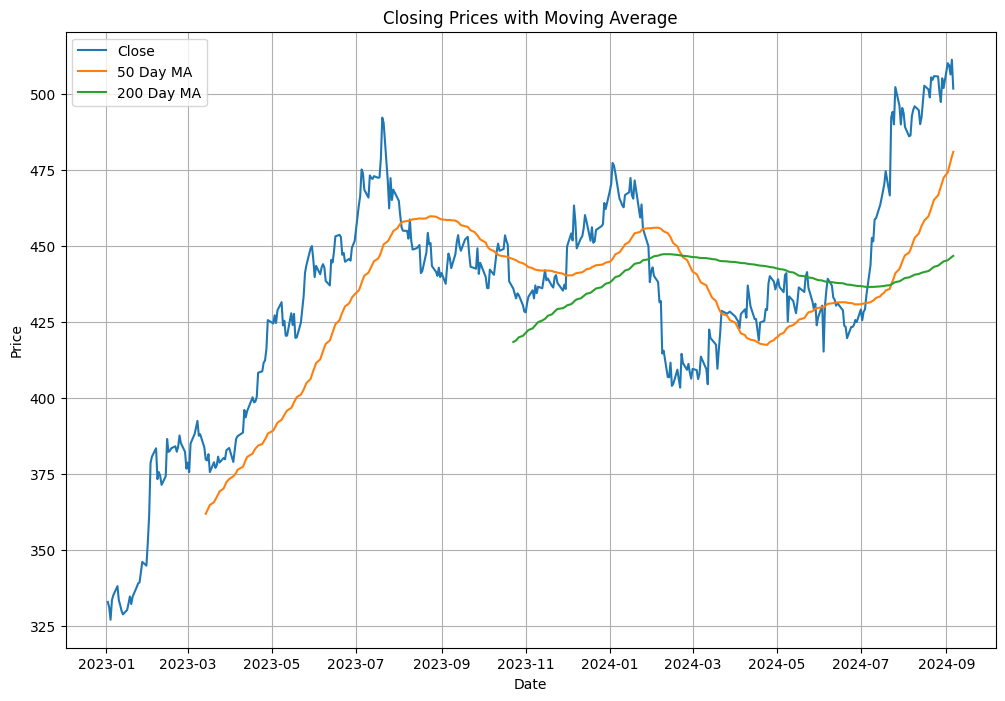

In [11]:
plt.figure(figsize=(12,8))
plt.plot(df.index,df.Close,label="Close")
plt.plot(df.index,df.MA50,label="50 Day MA")
plt.plot(df.index,df.MA200,label="200 Day MA")
plt.title("Closing Prices with Moving Average")
plt.xlabel("Date")
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [105]:
close=df['Close']

# Applying LSTM

In [14]:
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import numpy as np

In [15]:
scaler=StandardScaler()
close_scaled=scaler.fit_transform(close.values.reshape(-1,1))

In [106]:
train_size=int(len(close_scaled)*0.8)
train_data=close_scaled[:train_size]
test_data=close_scaled[train_size:]

In [107]:
test_data_actual=close[train_size:].values.reshape(-1,1)

In [108]:
def create_sequence(dataset,sequence_length):
    x=[]
    y=[]
    dataset1=dataset.reshape(-1,1)
    for i in range(len(dataset)-sequence_length):
        x.append(dataset1[i:i+sequence_length])
        y.append(dataset1[i+sequence_length])
    return np.array(x),np.array(y)

In [109]:
sequence_length=15
x_train,y_train=create_sequence(train_data,sequence_length)
x_test,y_test=create_sequence(test_data,sequence_length)

In [110]:
x_train.shape

(315, 15, 1)

In [20]:
x_test_actual,y_test_actual=create_sequence(test_data_actual,sequence_length)

In [21]:
#LSTM model
model=Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(sequence_length,1)))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
model.fit(x_train,y_train,epochs=50,batch_size=20)

Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.5367
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0980
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0762
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0669
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0654
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0642
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0489
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0595
Epoch 9/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0463
Epoch 10/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0379
Epoch 11/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0397
Epoch 12/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0428
Epoch 13/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0425
Epoch 14/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0391
Epoch 15/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0370
Epoc

In [23]:
predicted_values = model.predict(x_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 146ms/step


In [24]:
predicted_values = scaler.inverse_transform(predicted_values)

In [25]:
len(predicted_values)

68

In [26]:
predicted_values

array([[428.13113],
       [427.9989 ],
       [430.92047],
       [422.56827],
       [428.0311 ],
       [434.55887],
       [439.36047],
       [439.4283 ],
       [436.47864],
       [434.5916 ],
       [432.7433 ],
       [432.64886],
       [431.39233],
       [427.70206],
       [425.8775 ],
       [423.0547 ],
       [424.2628 ],
       [425.17847],
       [425.8723 ],
       [427.08173],
       [427.0946 ],
       [429.45206],
       [428.4252 ],
       [429.33325],
       [430.30188],
       [433.42892],
       [440.70108],
       [449.1279 ],
       [451.97833],
       [456.7517 ],
       [459.04282],
       [462.41153],
       [465.18298],
       [469.1564 ],
       [473.34406],
       [469.91794],
       [484.18625],
       [489.6662 ],
       [488.56287],
       [494.95612],
       [493.0411 ],
       [489.04556],
       [491.43262],
       [490.82947],
       [487.82196],
       [485.1865 ],
       [484.73373],
       [488.45563],
       [490.10995],
       [490.8919 ],


In [27]:
len(y_test_actual)

68

In [28]:
from sklearn.metrics import mean_squared_error,r2_score
rmse = np.sqrt(mean_squared_error(y_test_actual, predicted_values))
r2=r2_score(y_test_actual,predicted_values)
print("RMSE:", rmse)
print("R2",r2)

RMSE: 7.009516709452311
R2 0.9546244107991109


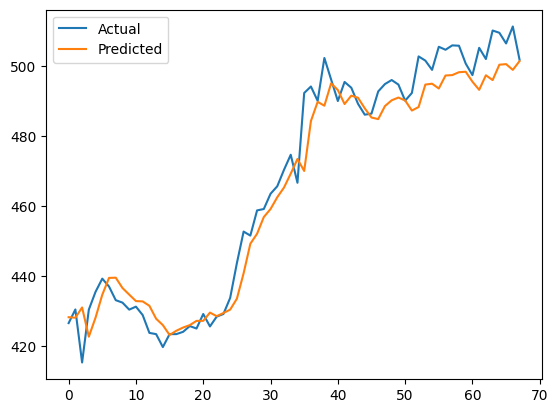

In [29]:
import matplotlib.pyplot as plt
plt.plot(y_test_actual, label='Actual')
plt.plot(predicted_values, label='Predicted')
plt.legend()
plt.show()

#Hyperparameter tuning

In [30]:
import keras_tuner
import keras

In [31]:
keras_tuner.HyperParameters()

In [ ]:
#LSTM model
# model=Sequential()
# model.add(LSTM(units=50,return_sequences=True,input_shape=(sequence_length,1)))
# model.add(LSTM(units=50))
# model.add(Dense(1))
# model.compile(optimizer='adam',loss='mean_squared_error')

In [43]:
def build_model(hp):
    model = Sequential()
    model.add(
        LSTM(
            # Tune number of units.
            units=hp.Int("units", min_value=20, max_value=100, step=10),
            # Tune the activation function to use.
            activation=hp.Choice("activation", ["relu", "tanh"]),
        )
    )
    model.add(Dense(1))
    # Define the optimizer learning rate as a hyperparameter.
    learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss="mean_squared_error",
    )
    return model

In [44]:
tuner = keras_tuner.RandomSearch(
    hypermodel=build_model,
    objective="val_loss",
    max_trials=3,
    executions_per_trial=2,
    overwrite=True,
    directory="my_dir",
    project_name="helloworld",
)

In [45]:
tuner.search(x_train, y_train, epochs=2, validation_data=(x_test, y_test))

Trial 3 Complete [00h 00m 08s]
val_loss: 0.14335449784994125

Best val_loss So Far: 0.14335449784994125
Total elapsed time: 00h 00m 26s


In [46]:
models = tuner.get_best_models(num_models=2)
best_model = models[0]
best_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 12 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 70)                  │          20,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              71 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,231 (79.03 KB)

 Trainable params: 20,231 (79.03 KB)

 Non-trainable params: 0 (0.00 B)

In [47]:
tuner.results_summary()

Results summary
Results in my_dir/helloworld
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 2 summary
Hyperparameters:
units: 70
activation: relu
lr: 0.004037826117868224
Score: 0.14335449784994125

Trial 1 summary
Hyperparameters:
units: 70
activation: tanh
lr: 0.00028516653530849865
Score: 1.2029353976249695

Trial 0 summary
Hyperparameters:
units: 20
activation: tanh
lr: 0.00023428258348397218
Score: 2.094212055206299


In [48]:
best_hps = tuner.get_best_hyperparameters(5)
# Build the model with the best hp.
model = build_model(best_hps[0])

In [38]:
best_hps

In [49]:
model.fit(x_train,y_train,epochs=50,batch_size=20)

Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.3965
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0630
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0323
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0306
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0238
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0237
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0230
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0251
Epoch 9/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0192
Epoch 10/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0210
Epoch 11/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0232
Epoch 12/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0223
Epoch 13/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0192
Epoch 14/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0210
Epoch 15/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0212
Epoch 1

In [50]:
predicted_values = model.predict(x_test)

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step


In [51]:
predicted_values = scaler.inverse_transform(predicted_values)

In [52]:
from sklearn.metrics import mean_squared_error,r2_score
rmse = np.sqrt(mean_squared_error(y_test_actual, predicted_values))
r2=r2_score(y_test_actual,predicted_values)
print("RMSE:", rmse)
print("R2",r2)

RMSE: 12.436091841971256
R2 0.8571717983409719


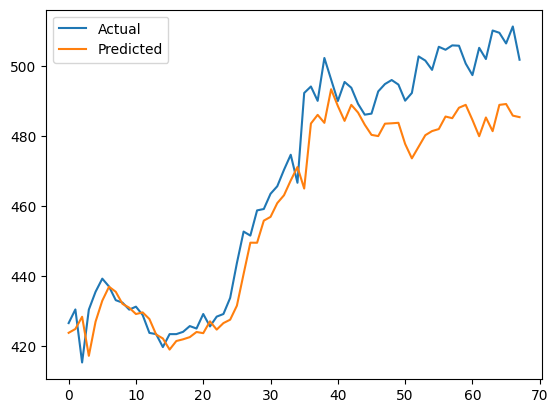

In [53]:
import matplotlib.pyplot as plt
plt.plot(y_test_actual, label='Actual')
plt.plot(predicted_values, label='Predicted')
plt.legend()
plt.show()

#Next Try

In [111]:
close

,Close
Date,
2023-01-02,332.850006
2023-01-03,331.100006
2023-01-04,327.000000
2023-01-05,333.450012
2023-01-06,335.049988
...,...
2024-09-02,510.049988
2024-09-03,509.399994
2024-09-04,506.350006


In [112]:
df1=close.to_frame()

In [113]:

df1["PriceIncrease"] = (df1["Close"].diff() > 0).astype(int)

print(df1)

                 Close  PriceIncrease
Date                                 
2023-01-02  332.850006              0
2023-01-03  331.100006              0
2023-01-04  327.000000              0
2023-01-05  333.450012              1
2023-01-06  335.049988              1
...                ...            ...
2024-09-02  510.049988              1
2024-09-03  509.399994              0
2024-09-04  506.350006              0
2024-09-05  511.200012              1
2024-09-06  501.700012              0

[413 rows x 2 columns]


In [114]:
scaler=StandardScaler()
df1['closed_scaled']=scaler.fit_transform(df1.Close.values.reshape(-1,1))

In [115]:
df1

,Close,PriceIncrease,closed_scaled
Date,,,
2023-01-02,332.850006,0,-2.637956
2023-01-03,331.100006,0,-2.684267
2023-01-04,327.000000,0,-2.792768
2023-01-05,333.450012,1,-2.622078
2023-01-06,335.049988,1,-2.579737
...,...,...,...
2024-09-02,510.049988,1,2.051382
2024-09-03,509.399994,0,2.034180
2024-09-04,506.350006,0,1.953467


In [116]:
train_size=int(0.8*len(df1))
test_size=len(df1)-train_size

In [120]:
def create_sequence(dataset,sequence_length=15):
      x=[]
      y=[]
      for i in range(len(dataset)-sequence_length):
          x.append(dataset.closed_scaled.values.reshape(-1,1)[i:i+sequence_length])
          y.append(dataset.PriceIncrease.values.reshape(-1,1)[i+sequence_length])
      return np.array(x),np.array(y)

In [121]:
x,y=create_sequence(df1)

In [72]:
df1.shape

(413, 3)

In [123]:
train_df1=df1.iloc[:train_size]
test_df1=df1.iloc[train_size:]

In [124]:
sequence_length=15
x_train,y_train=create_sequence(train_df1,sequence_length)
x_test,y_test=create_sequence(test_df1,sequence_length)

In [125]:
x_train.shape

(315, 15, 1)

In [126]:
def create_model():
    model=Sequential()
    model.add(LSTM(units=50,return_sequences=True,input_shape=(sequence_length,1)))
    model.add(LSTM(units=50))
    model.add(Dense(1,activation="sigmoid"))
    model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])
    return model

In [127]:
model=create_model()
hist = model.fit(x_train, y_train, batch_size=64, validation_split = 0.1, verbose = 1,epochs=50)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 139ms/step - accuracy: 0.5782 - loss: 0.2435 - val_accuracy: 0.5000 - val_loss: 0.2503
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5752 - loss: 0.2425 - val_accuracy: 0.5000 - val_loss: 0.2509
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5718 - loss: 0.2417 - val_accuracy: 0.5000 - val_loss: 0.2506
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5566 - loss: 0.2451 - val_accuracy: 0.5000 - val_loss: 0.2503
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5712 - loss: 0.2407 - val_accuracy: 0.5000 - val_loss: 0.2502
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5891 - loss: 0.2419 - val_accuracy: 0.5000 - val_loss: 0.2502
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5691 - loss: 0.2415 - val_accuracy: 0.5000 - val_loss: 0.2507
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5916 - loss: 0.2393 - val_accuracy: 0.5000 - val_loss: 0.2508
Epoch 9/50

In [128]:
score, acc = model.evaluate(x_test, y_test, batch_size=1)
print('Test score:', score)
print('Test accuracy:', acc)

68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5825 - loss: 0.2575
Test score: 0.2897930443286896
Test accuracy: 0.5882353186607361


In [129]:
model.predict(x_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 171ms/step


array([[0.53357327],
       [0.5348179 ],
       [0.5354237 ],
       [0.53726137],
       [0.5378394 ],
       [0.53719586],
       [0.5356795 ],
       [0.53419906],
       [0.5333324 ],
       [0.5329469 ],
       [0.53303283],
       [0.53323364],
       [0.53370637],
       [0.5347788 ],
       [0.5360377 ],
       [0.53761905],
       [0.5387613 ],
       [0.5395409 ],
       [0.54003674],
       [0.5400896 ],
       [0.5400039 ],
       [0.53942245],
       [0.53906125],
       [0.5385689 ],
       [0.5379895 ],
       [0.5369828 ],
       [0.5349226 ],
       [0.53178155],
       [0.5286428 ],
       [0.52521557],
       [0.52195966],
       [0.518702  ],
       [0.51545084],
       [0.511835  ],
       [0.5075696 ],
       [0.5038259 ],
       [0.49646622],
       [0.48533857],
       [0.47095865],
       [0.44802415],
       [0.41634122],
       [0.37882984],
       [0.3360847 ],
       [0.28167954],
       [0.2319709 ],
       [0.18442258],
       [0.14792901],
       [0.119

In [140]:
def build_model(hp):
    model = Sequential()
    model.add(
        LSTM(
            # Tune number of units.
            units=hp.Int("units", min_value=10, max_value=100, step=10),
            # Tune the activation function to use.
            activation=hp.Choice("activation", ["relu", "tanh"]),
        )
    )
    model.add(Dense(1,activation=hp.Choice("activation", ["softmax", "sigmoid"])))
    # Define the optimizer learning rate as a hyperparameter.
    learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")
    model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])
    return model

In [145]:
tuner = keras_tuner.BayesianOptimization(
    hypermodel=build_model,
    objective="val_accuracy",
    max_trials=3,
    executions_per_trial=2,
    overwrite=True,
    directory="my_dir",
    project_name="helloworld",
)

In [143]:
x_train.shape

(315, 15, 1)

In [146]:
tuner.search(x_train, y_train, epochs=4, validation_data=(x_test, y_test))

Trial 3 Complete [00h 00m 11s]
val_accuracy: 0.47058823704719543

Best val_accuracy So Far: 0.47058823704719543
Total elapsed time: 00h 00m 32s


In [147]:
models = tuner.get_best_models(num_models=2)
best_model = models[0]
best_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 12 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 40)                  │           6,720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              41 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,761 (26.41 KB)

 Trainable params: 6,761 (26.41 KB)

 Non-trainable params: 0 (0.00 B)

In [148]:
tuner.results_summary()

Results summary
Results in my_dir/helloworld
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0 summary
Hyperparameters:
units: 40
activation: relu
lr: 0.00030417880242188805
Score: 0.47058823704719543

Trial 2 summary
Hyperparameters:
units: 100
activation: tanh
lr: 0.0029902169136739785
Score: 0.47058823704719543

Trial 1 summary
Hyperparameters:
units: 40
activation: relu
lr: 0.006882586554868881
Score: 0.4485294073820114


In [136]:
best_hps = tuner.get_best_hyperparameters(5)
# Build the model with the best hp.
model = build_model(best_hps[0])

In [149]:
model.fit(x_train,y_train,epochs=100,batch_size=30)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5547 - loss: 0.2454
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6002 - loss: 0.2400
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5378 - loss: 0.2446 
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5455 - loss: 0.2403
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5426 - loss: 0.2438
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5883 - loss: 0.2382
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5686 - loss: 0.2440
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5328 - loss: 0.2401
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5799 - loss: 0.2362
Epoch 10/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5715 - loss: 0.2406
Epoch 11/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5650 - loss: 0.2403
Epoch 12/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accu

In [150]:
score, acc = model.evaluate(x_test, y_test, batch_size=1)
print('Test score:', score)
print('Test accuracy:', acc)

68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5046 - loss: 0.2571
Test score: 0.27403026819229126
Test accuracy: 0.4852941036224365
